# TB motion, Fg mods

Let's look at our original acceleration code:

In [1]:
# mStar is the mass of the central star, rStar is the *vector*
#  from planet to mass of star
def calcAcc(mStar, rStar):
    mag_r = (rStar[0]**2 + rStar[1]**2)**0.5
    mag_a = -G*mStar/mag_r**2
    # how about direction?  It's along rStar
    #  but we need to make sure this direction
    #  vector is a "hat" i.e. a unit vector
    # We want the direction only:
    unitVector = rStar/mag_r
    return mag_a*unitVector

# first for 1/r^2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# mass of particle 1 in solar masses
mass_of_star = 1.0
# distance of m2 at closest approach (pericenter)
rp = 1.0 # in AU - these are the distance from Sun to Earth units
# velocity of m2 at this closest approach distance
# we assume vp of the larger mass (m1) is negligable
vp = 35.0 # in km/s

# unit conversions
MassOfSun = 2e33 # g
MassOfJupiter = 1.898e30 # g
AUinCM = 1.496e13 # cm
kmincm = 1e5 # cm/km
G = 6.674e-8 # gravitational constant in cm^3 g^-1 s^-2

mass_of_star = mass_of_star*MassOfSun
vp = vp*kmincm
rp = rp*AUinCM

r_0 = np.array([rp, 0])
v_0 = np.array([0, vp])

# for 2 body - fancy stuff to pick nsteps for us
# analytically here are the constants we need to define to solve:
ecc = rp*vp*vp/(G*(mass_of_star)) - 1.0
a = rp/(1.0 - ecc)

Porb = np.sqrt( 4.0*np.pi**2.0*a**3.0/(G*(mass_of_star)) )
delta_t = Porb*0.0001

n_steps = int(np.round(Porb/delta_t))*10

ri = r_0
vi = v_0

r = []
for i in range(n_steps):
    # use function to grab ag
    ag = calcAcc(mass_of_star, ri)
    ri1 = ri + vi*delta_t
    vi1 = vi + ag*delta_t
    
    # append to r vector
    r.append(ri1)
    
    # replace stuff
    ri = ri1
    vi = vi1
    
# what does it look like?
r = np.array(r)

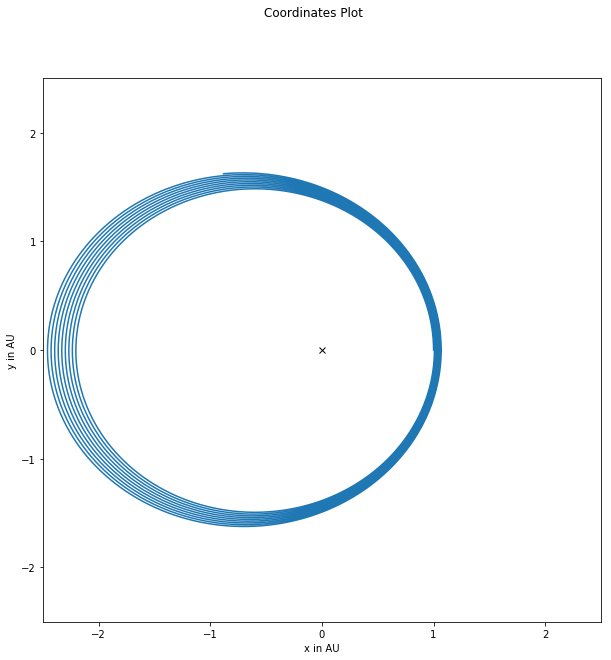

In [3]:
# plot x/y coords
fig, ax = plt.subplots(1, figsize = (10, 10))
fig.suptitle('Coordinates Plot')

ax.plot(0.0, 0.0, 'kx')
ax.set_xlabel('x in AU')
ax.set_ylabel('y in AU')

ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)

# plot Euler's solution
ax.plot(r[:,0]/AUinCM, r[:,1]/AUinCM)

plt.show()

The above shows a typical orbital solution using Euler's with a $1/r^2$ law.  Let's try $1/r^3$.  We can either write more functions, or we can include the power as a parameter.  Dealer's choice.

In [4]:
def calcAcc(mStar, rStar,p=2):
    mag_r = (rStar[0]**2 + rStar[1]**2)**0.5
    mag_a = -G*mStar/mag_r**p
    # how about direction?  It's along rStar
    #  but we need to make sure this direction
    #  vector is a "hat" i.e. a unit vector
    # We want the direction only:
    unitVector = rStar/mag_r
    return mag_a*unitVector

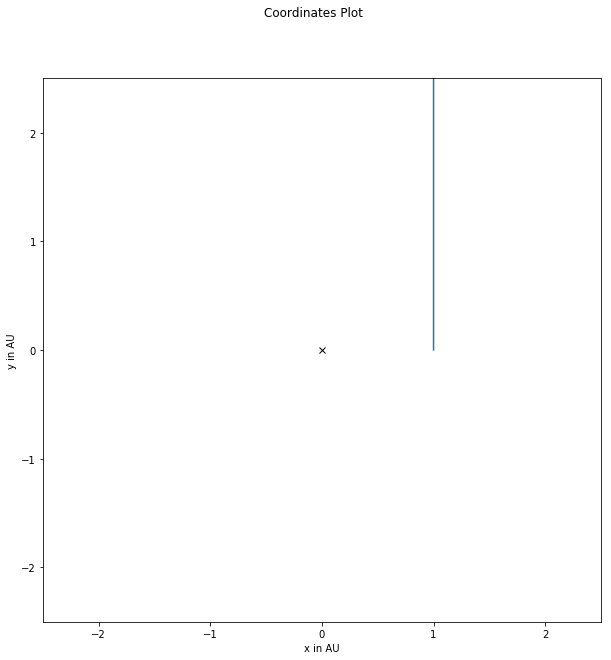

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# mass of particle 1 in solar masses
mass_of_star = 1.0
# distance of m2 at closest approach (pericenter)
rp = 1.0 # in AU - these are the distance from Sun to Earth units
# velocity of m2 at this closest approach distance
# we assume vp of the larger mass (m1) is negligable
vp = 35.0 # in km/s

# unit conversions
MassOfSun = 2e33 # g
MassOfJupiter = 1.898e30 # g
AUinCM = 1.496e13 # cm
kmincm = 1e5 # cm/km
G = 6.674e-8 # gravitational constant in cm^3 g^-1 s^-2

mass_of_star = mass_of_star*MassOfSun
vp = vp*kmincm
rp = rp*AUinCM

r_0 = np.array([rp, 0])
v_0 = np.array([0, vp])

# for 2 body - fancy stuff to pick nsteps for us
# analytically here are the constants we need to define to solve:
ecc = rp*vp*vp/(G*(mass_of_star)) - 1.0
a = rp/(1.0 - ecc)

Porb = np.sqrt( 4.0*np.pi**2.0*a**3.0/(G*(mass_of_star)) )
delta_t = Porb*0.0001

n_steps = int(np.round(Porb/delta_t))*10

ri = r_0
vi = v_0

r = []
for i in range(n_steps):
    # use function to grab ag
    ag = calcAcc(mass_of_star, ri, p=3)
    ri1 = ri + vi*delta_t
    vi1 = vi + ag*delta_t
    
    # append to r vector
    r.append(ri1)
    
    # replace stuff
    ri = ri1
    vi = vi1
    
# what does it look like?
r = np.array(r)


### PLOT
# plot x/y coords
fig, ax = plt.subplots(1, figsize = (10, 10))
fig.suptitle('Coordinates Plot')

ax.plot(0.0, 0.0, 'kx')
ax.set_xlabel('x in AU')
ax.set_ylabel('y in AU')

ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)

# plot Euler's solution
ax.plot(r[:,0]/AUinCM, r[:,1]/AUinCM)

plt.show()

Now $1/r^{2.1}$:

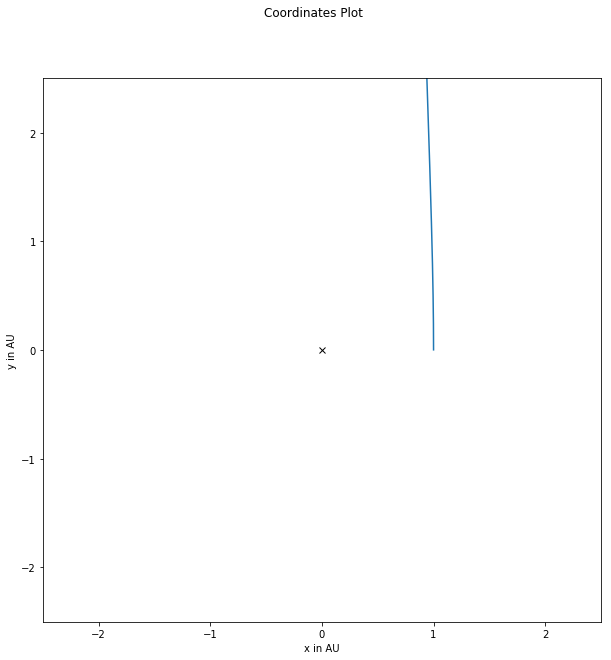

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# mass of particle 1 in solar masses
mass_of_star = 1.0
# distance of m2 at closest approach (pericenter)
rp = 1.0 # in AU - these are the distance from Sun to Earth units
# velocity of m2 at this closest approach distance
# we assume vp of the larger mass (m1) is negligable
vp = 35.0 # in km/s

# unit conversions
MassOfSun = 2e33 # g
MassOfJupiter = 1.898e30 # g
AUinCM = 1.496e13 # cm
kmincm = 1e5 # cm/km
G = 6.674e-8 # gravitational constant in cm^3 g^-1 s^-2

mass_of_star = mass_of_star*MassOfSun
vp = vp*kmincm
rp = rp*AUinCM

r_0 = np.array([rp, 0])
v_0 = np.array([0, vp])

# for 2 body - fancy stuff to pick nsteps for us
# analytically here are the constants we need to define to solve:
ecc = rp*vp*vp/(G*(mass_of_star)) - 1.0
a = rp/(1.0 - ecc)

Porb = np.sqrt( 4.0*np.pi**2.0*a**3.0/(G*(mass_of_star)) )
delta_t = Porb*0.0001

n_steps = int(np.round(Porb/delta_t))*10

ri = r_0
vi = v_0

r = []
for i in range(n_steps):
    # use function to grab ag
    ag = calcAcc(mass_of_star, ri, p=2.1)
    ri1 = ri + vi*delta_t
    vi1 = vi + ag*delta_t
    
    # append to r vector
    r.append(ri1)
    
    # replace stuff
    ri = ri1
    vi = vi1
    
# what does it look like?
r = np.array(r)


### PLOT
# plot x/y coords
fig, ax = plt.subplots(1, figsize = (10, 10))
fig.suptitle('Coordinates Plot')

ax.plot(0.0, 0.0, 'kx')
ax.set_xlabel('x in AU')
ax.set_ylabel('y in AU')

ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)

# plot Euler's solution
ax.plot(r[:,0]/AUinCM, r[:,1]/AUinCM)

plt.show()

Now $1/r^{1.9}:

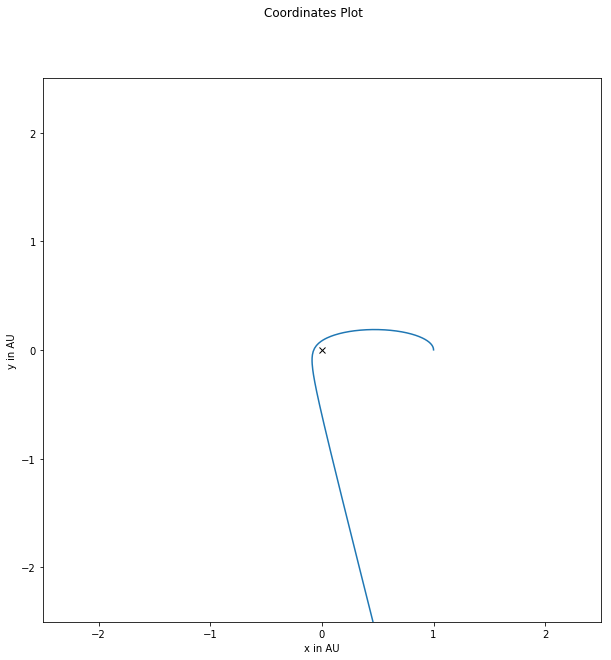

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# mass of particle 1 in solar masses
mass_of_star = 1.0
# distance of m2 at closest approach (pericenter)
rp = 1.0 # in AU - these are the distance from Sun to Earth units
# velocity of m2 at this closest approach distance
# we assume vp of the larger mass (m1) is negligable
vp = 35.0 # in km/s

# unit conversions
MassOfSun = 2e33 # g
MassOfJupiter = 1.898e30 # g
AUinCM = 1.496e13 # cm
kmincm = 1e5 # cm/km
G = 6.674e-8 # gravitational constant in cm^3 g^-1 s^-2

mass_of_star = mass_of_star*MassOfSun
vp = vp*kmincm
rp = rp*AUinCM

r_0 = np.array([rp, 0])
v_0 = np.array([0, vp])

# for 2 body - fancy stuff to pick nsteps for us
# analytically here are the constants we need to define to solve:
ecc = rp*vp*vp/(G*(mass_of_star)) - 1.0
a = rp/(1.0 - ecc)

Porb = np.sqrt( 4.0*np.pi**2.0*a**3.0/(G*(mass_of_star)) )
delta_t = Porb*0.0001

n_steps = int(np.round(Porb/delta_t))*10

ri = r_0
vi = v_0

r = []
for i in range(n_steps):
    # use function to grab ag
    ag = calcAcc(mass_of_star, ri, p=1.9)
    ri1 = ri + vi*delta_t
    vi1 = vi + ag*delta_t
    
    # append to r vector
    r.append(ri1)
    
    # replace stuff
    ri = ri1
    vi = vi1
    
# what does it look like?
r = np.array(r)


### PLOT
# plot x/y coords
fig, ax = plt.subplots(1, figsize = (10, 10))
fig.suptitle('Coordinates Plot')

ax.plot(0.0, 0.0, 'kx')
ax.set_xlabel('x in AU')
ax.set_ylabel('y in AU')

ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)

# plot Euler's solution
ax.plot(r[:,0]/AUinCM, r[:,1]/AUinCM)

plt.show()

We can try higher precision calculations with Euler's to see if we can do any better.  With 2 orders of magnitude larger number of timesteps, the $1/r^{2.1}$ solution looks like:

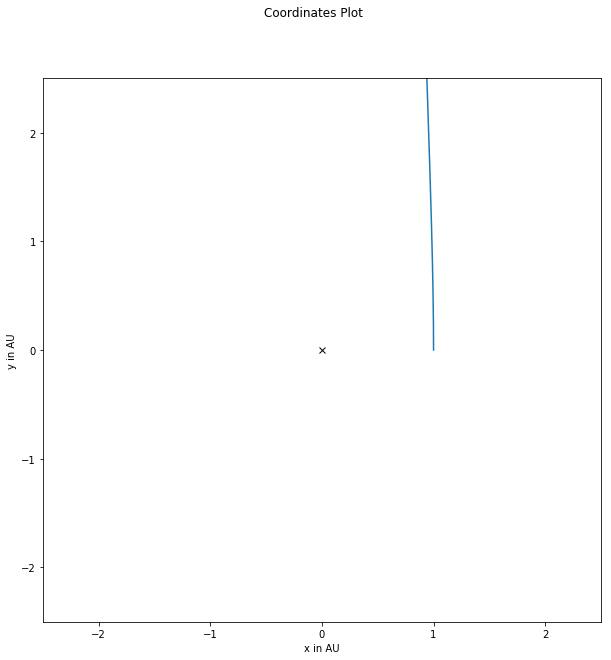

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# mass of particle 1 in solar masses
mass_of_star = 1.0
# distance of m2 at closest approach (pericenter)
rp = 1.0 # in AU - these are the distance from Sun to Earth units
# velocity of m2 at this closest approach distance
# we assume vp of the larger mass (m1) is negligable
vp = 35.0 # in km/s

# unit conversions
MassOfSun = 2e33 # g
MassOfJupiter = 1.898e30 # g
AUinCM = 1.496e13 # cm
kmincm = 1e5 # cm/km
G = 6.674e-8 # gravitational constant in cm^3 g^-1 s^-2

mass_of_star = mass_of_star*MassOfSun
vp = vp*kmincm
rp = rp*AUinCM

r_0 = np.array([rp, 0])
v_0 = np.array([0, vp])

# for 2 body - fancy stuff to pick nsteps for us
# analytically here are the constants we need to define to solve:
ecc = rp*vp*vp/(G*(mass_of_star)) - 1.0
a = rp/(1.0 - ecc)

Porb = np.sqrt( 4.0*np.pi**2.0*a**3.0/(G*(mass_of_star)) )
delta_t = Porb*0.000001

n_steps = int(np.round(Porb/delta_t))*10

ri = r_0
vi = v_0

r = []
for i in range(n_steps):
    # use function to grab ag
    ag = calcAcc(mass_of_star, ri, p=2.1)
    ri1 = ri + vi*delta_t
    vi1 = vi + ag*delta_t
    
    # append to r vector
    r.append(ri1)
    
    # replace stuff
    ri = ri1
    vi = vi1
    
# what does it look like?
r = np.array(r)


### PLOT
# plot x/y coords
fig, ax = plt.subplots(1, figsize = (10, 10))
fig.suptitle('Coordinates Plot')

ax.plot(0.0, 0.0, 'kx')
ax.set_xlabel('x in AU')
ax.set_ylabel('y in AU')

ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)

# plot Euler's solution
ax.plot(r[:,0]/AUinCM, r[:,1]/AUinCM)

plt.show()

With 2 orders of magnitude larger timesteps, the $1/r^{1.9}$ solution looks like:

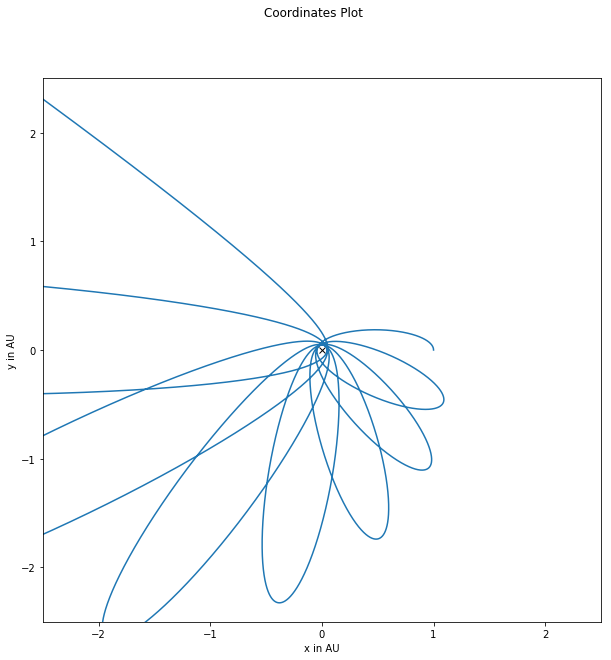

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# mass of particle 1 in solar masses
mass_of_star = 1.0
# distance of m2 at closest approach (pericenter)
rp = 1.0 # in AU - these are the distance from Sun to Earth units
# velocity of m2 at this closest approach distance
# we assume vp of the larger mass (m1) is negligable
vp = 35.0 # in km/s

# unit conversions
MassOfSun = 2e33 # g
MassOfJupiter = 1.898e30 # g
AUinCM = 1.496e13 # cm
kmincm = 1e5 # cm/km
G = 6.674e-8 # gravitational constant in cm^3 g^-1 s^-2

mass_of_star = mass_of_star*MassOfSun
vp = vp*kmincm
rp = rp*AUinCM

r_0 = np.array([rp, 0])
v_0 = np.array([0, vp])

# for 2 body - fancy stuff to pick nsteps for us
# analytically here are the constants we need to define to solve:
ecc = rp*vp*vp/(G*(mass_of_star)) - 1.0
a = rp/(1.0 - ecc)

Porb = np.sqrt( 4.0*np.pi**2.0*a**3.0/(G*(mass_of_star)) )
delta_t = Porb*0.000001

n_steps = int(np.round(Porb/delta_t))*10

ri = r_0
vi = v_0

r = []
for i in range(n_steps):
    # use function to grab ag
    ag = calcAcc(mass_of_star, ri, p=1.9)
    ri1 = ri + vi*delta_t
    vi1 = vi + ag*delta_t
    
    # append to r vector
    r.append(ri1)
    
    # replace stuff
    ri = ri1
    vi = vi1
    
# what does it look like?
r = np.array(r)


### PLOT
# plot x/y coords
fig, ax = plt.subplots(1, figsize = (10, 10))
fig.suptitle('Coordinates Plot')

ax.plot(0.0, 0.0, 'kx')
ax.set_xlabel('x in AU')
ax.set_ylabel('y in AU')

ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)

# plot Euler's solution
ax.plot(r[:,0]/AUinCM, r[:,1]/AUinCM)

plt.show()

Here the take-away is that even with values very close to $1/r^2$, we don't get as stable orbits as we see with an exact $1/r^2$ gravitational law.  This is actually something you can prove with much more math than is expected here - $1/r^2$ laws are what is needed for stable gravitational orbits!

## Extra credit:
There can be a variety of answers for $C$, here is just one solution:

In [11]:
def calcAcc(mStar, rStar,C=0.0):
    mag_r = (rStar[0]**2 + rStar[1]**2)**0.5
    mag_a = -G*mStar/mag_r**2 - C*G*mStar/mag_r**4
    unitVector = rStar/mag_r
    return mag_a*unitVector

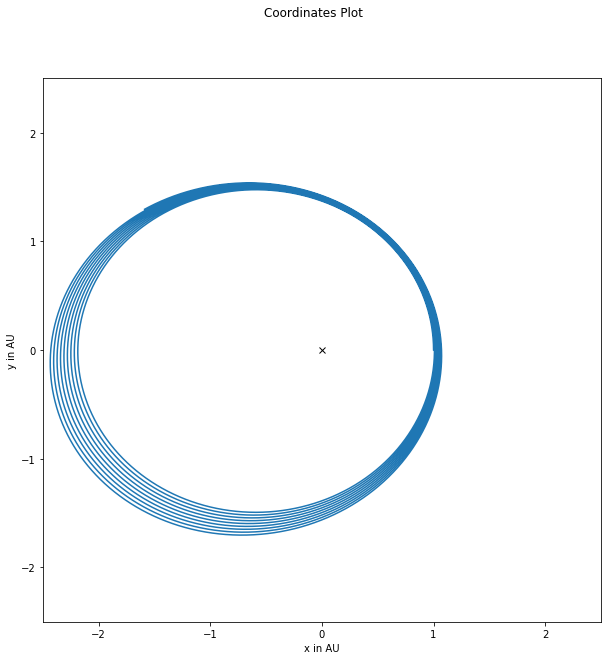

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# mass of particle 1 in solar masses
mass_of_star = 1.0
# distance of m2 at closest approach (pericenter)
rp = 1.0 # in AU - these are the distance from Sun to Earth units
# velocity of m2 at this closest approach distance
# we assume vp of the larger mass (m1) is negligable
vp = 35.0 # in km/s

# unit conversions
MassOfSun = 2e33 # g
MassOfJupiter = 1.898e30 # g
AUinCM = 1.496e13 # cm
kmincm = 1e5 # cm/km
G = 6.674e-8 # gravitational constant in cm^3 g^-1 s^-2

mass_of_star = mass_of_star*MassOfSun
vp = vp*kmincm
rp = rp*AUinCM

r_0 = np.array([rp, 0])
v_0 = np.array([0, vp])

# for 2 body - fancy stuff to pick nsteps for us
# analytically here are the constants we need to define to solve:
ecc = rp*vp*vp/(G*(mass_of_star)) - 1.0
a = rp/(1.0 - ecc)

Porb = np.sqrt( 4.0*np.pi**2.0*a**3.0/(G*(mass_of_star)) )
delta_t = Porb*0.0001

n_steps = int(np.round(Porb/delta_t))*10

ri = r_0
vi = v_0

r = []
for i in range(n_steps):
    # use function to grab ag
    ag = calcAcc(mass_of_star, ri, C=1e24)
    ri1 = ri + vi*delta_t
    vi1 = vi + ag*delta_t
    
    # append to r vector
    r.append(ri1)
    
    # replace stuff
    ri = ri1
    vi = vi1
    
# what does it look like?
r = np.array(r)


### PLOT
# plot x/y coords
fig, ax = plt.subplots(1, figsize = (10, 10))
fig.suptitle('Coordinates Plot')

ax.plot(0.0, 0.0, 'kx')
ax.set_xlabel('x in AU')
ax.set_ylabel('y in AU')

ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)

# plot Euler's solution
ax.plot(r[:,0]/AUinCM, r[:,1]/AUinCM)

plt.show()

For $C \sim 10^{24}$ we start to see a little asymmetry in our orbit. And for $C \sim 10^{25}$ we can really see changes to the orbit when we compare to our first plot:

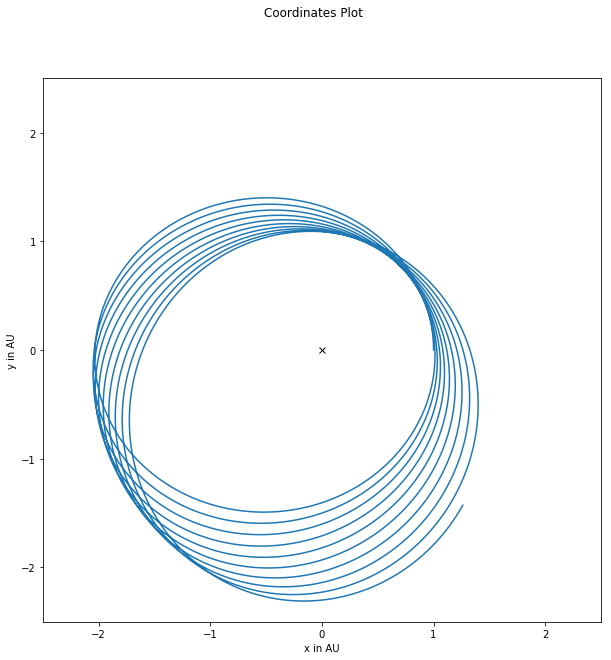

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# mass of particle 1 in solar masses
mass_of_star = 1.0
# distance of m2 at closest approach (pericenter)
rp = 1.0 # in AU - these are the distance from Sun to Earth units
# velocity of m2 at this closest approach distance
# we assume vp of the larger mass (m1) is negligable
vp = 35.0 # in km/s

# unit conversions
MassOfSun = 2e33 # g
MassOfJupiter = 1.898e30 # g
AUinCM = 1.496e13 # cm
kmincm = 1e5 # cm/km
G = 6.674e-8 # gravitational constant in cm^3 g^-1 s^-2

mass_of_star = mass_of_star*MassOfSun
vp = vp*kmincm
rp = rp*AUinCM

r_0 = np.array([rp, 0])
v_0 = np.array([0, vp])

# for 2 body - fancy stuff to pick nsteps for us
# analytically here are the constants we need to define to solve:
ecc = rp*vp*vp/(G*(mass_of_star)) - 1.0
a = rp/(1.0 - ecc)

Porb = np.sqrt( 4.0*np.pi**2.0*a**3.0/(G*(mass_of_star)) )
delta_t = Porb*0.0001

n_steps = int(np.round(Porb/delta_t))*10

ri = r_0
vi = v_0

r = []
for i in range(n_steps):
    # use function to grab ag
    ag = calcAcc(mass_of_star, ri, C=1e25)
    ri1 = ri + vi*delta_t
    vi1 = vi + ag*delta_t
    
    # append to r vector
    r.append(ri1)
    
    # replace stuff
    ri = ri1
    vi = vi1
    
# what does it look like?
r = np.array(r)


### PLOT
# plot x/y coords
fig, ax = plt.subplots(1, figsize = (10, 10))
fig.suptitle('Coordinates Plot')

ax.plot(0.0, 0.0, 'kx')
ax.set_xlabel('x in AU')
ax.set_ylabel('y in AU')

ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)

# plot Euler's solution
ax.plot(r[:,0]/AUinCM, r[:,1]/AUinCM)

plt.show()

The take away here is that the $1/r^4$ portion of the gravitational law, meant to mimic general relativisitic (GR) forces, is pretty darn weak!  We need to mulitply it by a large constant in order to see any changes in our orbit.  This is why we can only see GR effects for planets like Mercury which orbit close to the Sun where the gravity field is strong enough to warp space-time enough to change the orbit of Mercury from its Newtonian approximation.